# Introduction
In this project I will build a Linear regression model for the Medical cost dataset. I will predict individual medical costs billed by health insurance.

## 1) Importing and understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Leead\Desktop\insurance.csv')
# you can see here the head of the database:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
charges = df['charges'].mean()
print('The average medical cost is: ',round(charges),'$')

The average medical cost is:  13270 $


#### Feature Description

1) age: age of the person.<br>
2) sex: gender (female or male).<br>
3) bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,<br>
   objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
4) children: Number of children covered by health insurance / Number of dependents(Maximum 5)<br>
5) smoker: does the patient smoke?<br>
6) region: the patients residential area in the US, northeast, southeast, southwest, northwest.<br>
7) charges: Individual medical costs billed by health insurance<br>

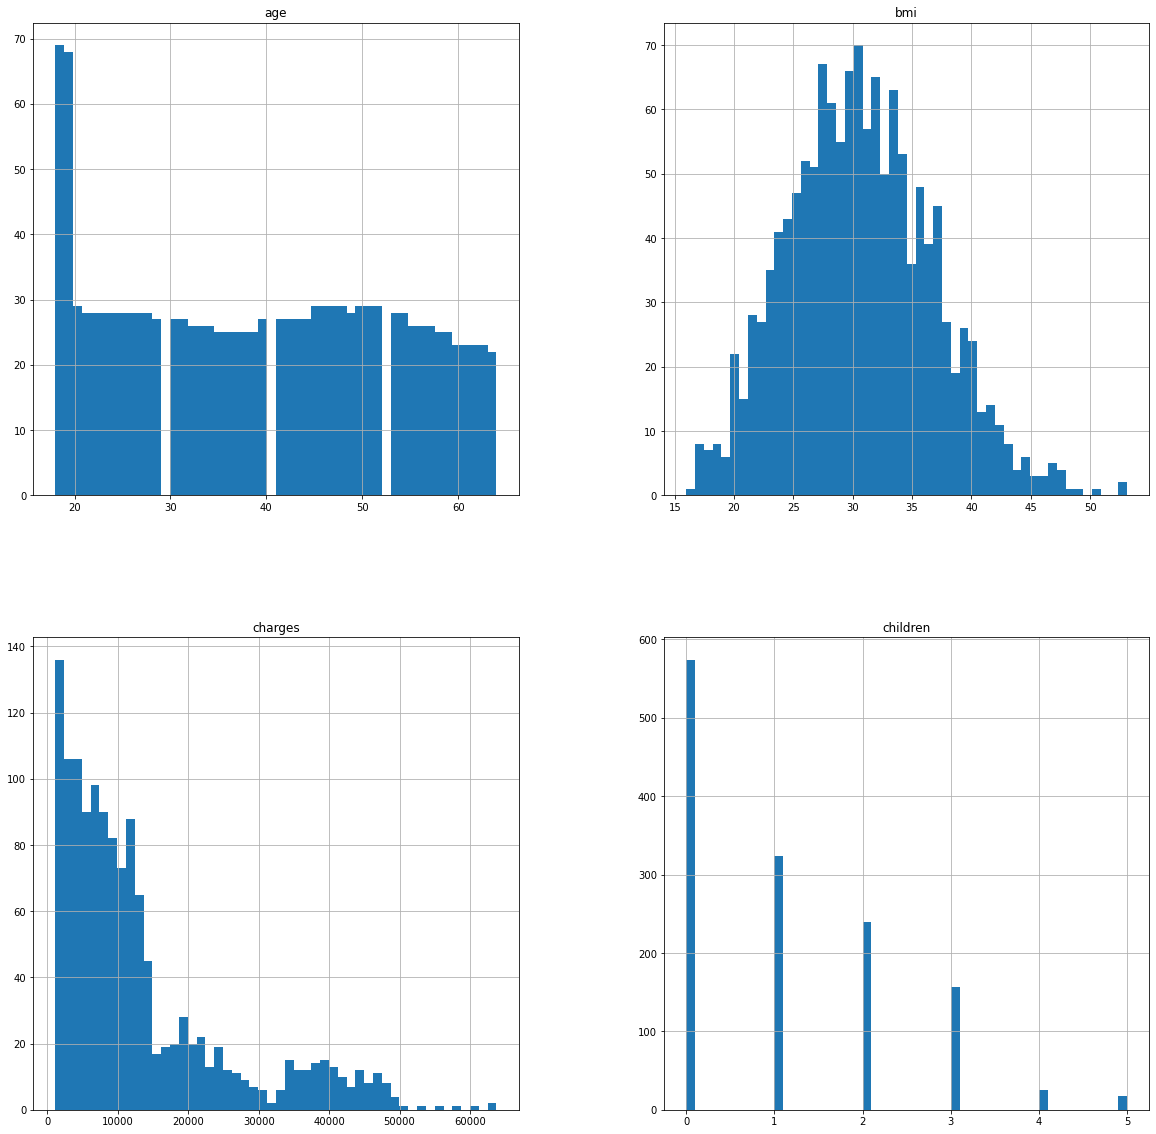

In [5]:
# First-hand look at the numerical features and their average grades:
df.hist(bins=50, figsize=(20,20))
plt.show()

## 2) Cleaning the data

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


$\bullet$ There are no unnecessary features, so I won't remove any.

In [7]:
df.shape

(1338, 7)

#### We have 1338 examples and 7 features, whereas 'charges' is the target feature. 

#### Let's check if there are any null brackets.

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

$\bullet$ There are no null brackets so I won't have to fill anything.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


#### Info Summary:
$ \bullet int64(18):$ <br>
age<br>
children<br>

$\bullet object(5):$ <br>
sex<br>
smoker<br> 
region<br>

$\bullet float64(1):$ <br>
bmi<br>
charges<br>

### Change the 'object' type features into 'int' type
I will change features to type int in order to allow the data to be analized better and easier.

In [10]:
# Feature: sex:
df['sex'].replace({'male': 0, 'female': 1},inplace = True)

In [11]:
# Feature: smoker:
df['smoker'].replace({'no': 0, 'yes': 1},inplace = True)

In [12]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
# Feature: region:
df['region'].replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3},inplace = True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


## 2) Visualization

#### Let's have a look at the correltion heatmap to see which features have the most correlation with charges.

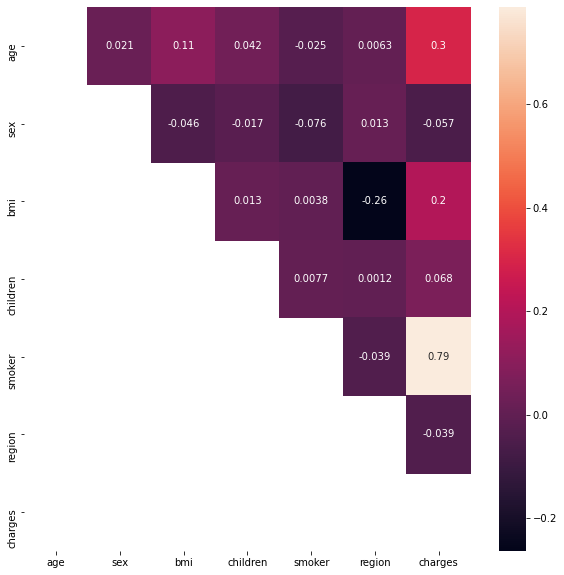

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, mask=np.tril(df.corr()))

Brief overview:<br>
$\bullet$ We can see that smoking impacts the medical charges the most, which is understandable.<br>
$\bullet$ Age is a strong factor in medical charges, the older one gets, the more medical attention he needs.<br>
$\bullet$ Surprisingly the sex does not have a lot of coorlationwith charges.<br>

#### Let's analyze the heat map in ratio to charges

$\bullet$ Age vs Charges

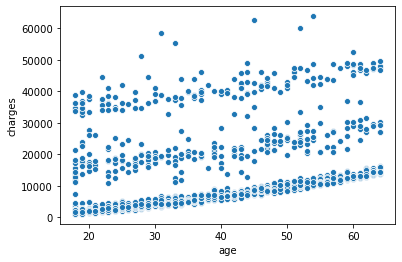

In [17]:
plot_age = sns.scatterplot(y = 'charges', x = 'age', data=df)
plt.show()

Observation:
We can clearly see that as you get older, your medical bill tends to increase, which is understandable.

$\bullet$ Sex vs Charges

In [18]:
df[["sex","charges"]].groupby(["sex"],as_index=False).mean().sort_values(by="charges",ascending=False)

# Male = 0
#female = 1

,sex,charges
0,0,13956.751178
1,1,12569.578844


Observation:
As we can see female spend just about $1400 less then males do. Which to me can mean that maybe male tend to be more sick than female.

smoker  sex
0       0       8087.204731
        1       8762.297300
1       0      33042.005975
        1      30678.996276
Name: charges, dtype: float64

smoker  sex
0       0      30.770580
        1      30.539525
1       0      31.504182
        1      29.608261
Name: bmi, dtype: float64

$\bullet$ Smoker vs Charges

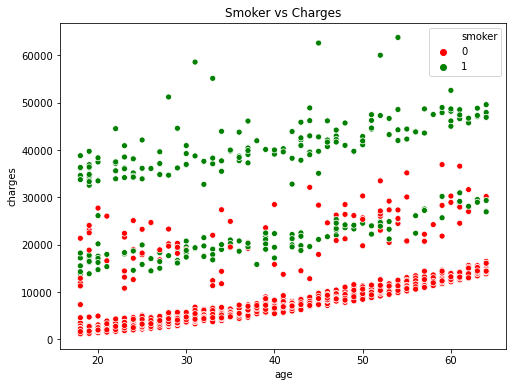

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'])
plt.title("Smoker vs Charges")
plt.show()

Observation:<br>
$smoker = 1$<br>
$non-smoker = 0$<br>
$\bullet$We can clearly see that a patient that smokes, on average is going to have a higher medical bill than a non-smoker.<br>
$\bullet$ What we can also learn is that the older you get the medical bill for smokers rise in a linear fasion.

$\bullet$ BMI vs Charges

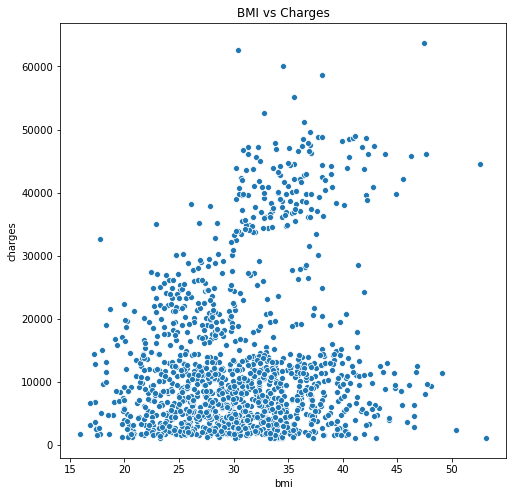

In [20]:
plt.figure(figsize=(8,8))
sns.scatterplot(df.bmi, df.charges)
plt.title("BMI vs Charges")
plt.show()

Observation:<br>
$\bullet$ A healthy adults bmi should be between 18.5 to 25(not including). Over that and under 30 is considered overweight and anything over that is considered obesity. As we can see in the graph, if your BMI is over 30, your medical charges go up. This makes a lot of sense.<br>

Observation:
From out data, we can see that most smokers also have a high BMI. This is interesting and it makes sense. People who smoke tend to not exercise as much which has a straight effect on body fat.

$\bullet$ Region vs Charges

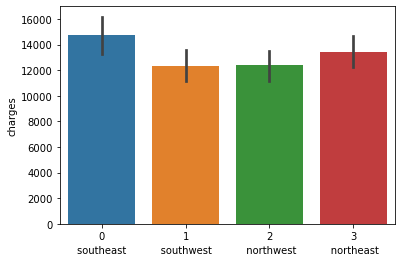

In [21]:
sns.barplot(x='region', y='charges', data=df)
plt.xlabel("southeast           southwest           northwest           northeast")
plt.show()

Observation:
We can see according to the our data that around the southeast region the medical cost goes up. Maybe because it is a tropical are which tends to attract older people.

$\bullet$ Children vs Charges

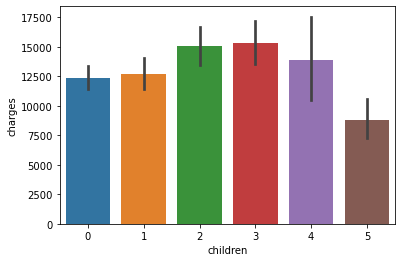

In [22]:
sns.barplot(x='children', y='charges', data=df)
plt.show()

Observation:
We can see that if you have the maximum and minimum amount of children in the dataset, you spend this least on medical costs. This might be because if you have 5 children, you have less money to spend medicaly on them. If you have no children then you just don't have the medical costs to spend.

#### Since BMI and Smoking are the main two contributers to medical charges, I would like to see which one is more costly:

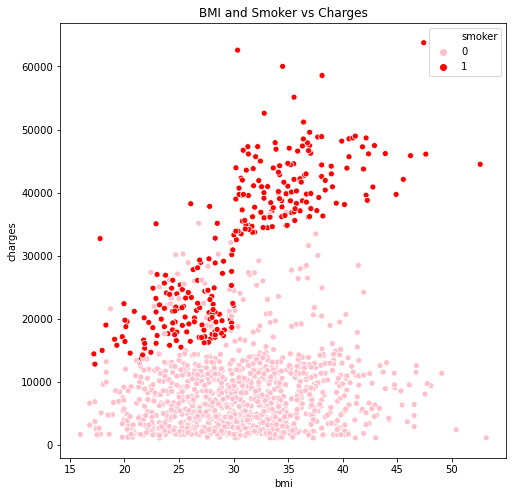

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(df.bmi, df.charges,hue = df.smoker, palette= ['pink','red'])
plt.title("BMI and Smoker vs Charges")
plt.show()

#### Let's use Groupby and check the data more.

In [66]:
a = df.groupby("smoker")
a.mean()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,39.385338,0.514098,30.651795,1.090226,1.477444,8434.268298
1,38.514599,0.419708,30.708449,1.113139,1.368613,32050.231832


In [64]:
df.groupby(['smoker', "sex"]).charges.mean()

smoker  sex
0       0       8087.204731
        1       8762.297300
1       0      33042.005975
        1      30678.996276
Name: charges, dtype: float64

Observation: We can see that nonsmoking women spend more on medical bills then men, but when it comes to smoking men are the ones who spend more.<br>
Let's see if the bmi might cause this effect.

In [65]:
df.groupby(['smoker', "sex"]).bmi.mean()

smoker  sex
0       0      30.770580
        1      30.539525
1       0      31.504182
        1      29.608261
Name: bmi, dtype: float64

Observation: <br>
$\bullet$ What we can see here, is that bmi is greater for men who smoke than woman. Also, their bmi exceeds 30 which falls into the obesity catagory. This might be the reason why the men medical bills are higher than woman.


$\bullet$ We can see through the chart that smoking has a greater influence on the medical cost than BMI.<br>
$\bullet$ We can also learn from the groupby chart, that in both smokers and non-smokers, the BMI is just about the same. What is more interesting is that the medical cost almost quadruples if you are a smoker. Don't smoke!<br>
$\bullet$ I see a lot of outliers in the chart so when I scale the data I will use the StandardScaler.

## 3) Machine learning Models

#### First let's split the test set to be 20% and the train set to be 80%.

In [25]:
# Importing
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['charges'], axis = 1)
Y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


We can see that the data was split accordingly:<br>
Train: 1070 rows and 6 columns(dropped 'charges')<br>
Test: 268 rows and 6 columns(dropped 'charges')

#### Scaling the data using the StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
print("x_train")
print(x_train)
print()
print("x_test")
print(x_test)

x_train
[[-0.14853305 -1.01506676  0.54530479  2.41394802  1.97125461 -0.38136011]
 [-1.49780784 -1.01506676  0.59867181 -0.89219519 -0.50729114 -1.27231059]
 [-1.14273553  0.98515688  0.96092064  0.76087642  1.97125461  1.40054085]
 ...
 [ 0.06451033 -1.01506676 -0.91339361 -0.89219519 -0.50729114 -1.27231059]
 [-1.42679338 -1.01506676  0.77656186 -0.89219519 -0.50729114  0.50959037]
 [-0.4325909   0.98515688 -1.97749955 -0.06565939 -0.50729114 -0.38136011]]

x_test
[[ 0.91668389 -1.01506676 -0.08539629 -0.06565939 -0.50729114 -0.38136011]
 [ 0.56161157  0.98515688 -0.21962242 -0.06565939 -0.50729114 -1.27231059]
 [ 0.63262604 -1.01506676  1.59081313  0.76087642  1.97125461  0.50959037]
 ...
 [ 1.2717562  -1.01506676  1.54472343 -0.89219519 -0.50729114  1.40054085]
 [-0.64563429  0.98515688  1.34581001  1.58741222  1.97125461 -1.27231059]
 [ 0.49059711 -1.01506676 -0.95948331  1.58741222 -0.50729114  1.40054085]]


### $\bullet$ Linear Regression

In [28]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [29]:
lReg = linear_model.LinearRegression()
lReg.fit(x_train,y_train) #training the algorithm
y_train_pred = lReg.predict(x_train)
y_test_pred = lReg.predict(x_test)
lReg.score(x_test,y_test)

0.799796841255606

$\bullet$ We got a score of 0.799%

In [30]:
#Let's remember what the mean of the charges was:
charges = df['charges'].mean()
print('The average medical cost is: $',round(charges))

The average medical cost is: $ 13270


In [31]:
y_pred = lReg.predict(x_test)
pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred, "Difference": np.array(abs(y_test-y_pred))})

,Actual Cost,Predicted Cost,Difference
578,9724.53000,11284.718170,1560.188170
610,8547.69130,9426.825984,879.134684
569,45702.02235,38132.984183,7569.038167
1034,12950.07120,16212.994235,3262.923035
198,9644.25250,6844.372246,2799.880254
...,...,...,...
1084,15019.76005,14691.489056,328.270994
726,6664.68595,8213.262079,1548.576129
1132,20709.02034,16161.602178,4547.418162
725,40932.42950,32855.664400,8076.765100


A graph to see the Prediction/Actual Cost ratio

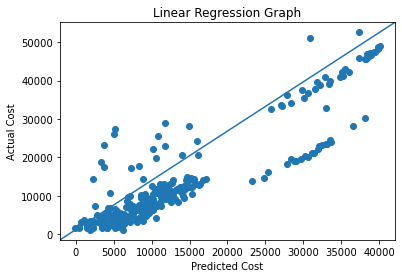

In [32]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Cost")
plt.ylabel("Actual Cost")
plt.title("Linear Regression Graph")
plt.show()

Let's check the following paramaters:<br>
$\bullet$ R-squared is a statistical measure of how close the data are to the fitted regression line. The higher the better.<br>
$\bullet$ Mean Absolute Error - is the amount of error in your measurements. It is the difference between the Predicted Cost and the Actual Cost value.<br>
$\bullet$ Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors)(Difference). Residuals are a measure of how far from the regression line data points are.The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [33]:
print('R-Squared score: ',lReg.score(x_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Squared score:  0.7369902703793605
Mean Absolute Error: 3930.8744170009018
Root Mean Squared Error: 5644.317594516271


Observation:<br>
$\bullet$ We can see that the model RMSE is \\$5,644, and the actual mean is \\$13,270. That means the model is off by almost 50%, which is not so great.<br>
$\bullet$ Our R-Squared score is 0.736, which means the model fits 73% of the data, not bad.

### $\bullet$ Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dtReg = DecisionTreeRegressor(random_state=0)
dtReg.fit(x_train, y_train)
y_pred_dtReg = dtReg.predict(x_test)
dtReg.score(x_test,y_test)

0.6821208964897647

In [36]:
pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred_dtReg, "Difference": np.array(abs(y_test-y_pred_dtReg))})

,Actual Cost,Predicted Cost,Difference
578,9724.53000,10797.33620,1072.80620
610,8547.69130,21232.18226,12684.49096
569,45702.02235,44202.65360,1499.36875
1034,12950.07120,13143.86485,193.79365
198,9644.25250,9566.99090,77.26160
...,...,...,...
1084,15019.76005,15612.19335,592.43330
726,6664.68595,6393.60345,271.08250
1132,20709.02034,10982.50130,9726.51904
725,40932.42950,58571.07448,17638.64498


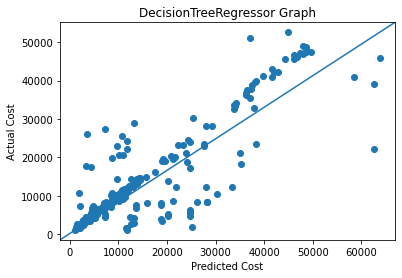

In [37]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred_dtReg, y_test)
plt.xlabel("Predicted Cost")
plt.ylabel("Actual Cost")
plt.title("DecisionTreeRegressor Graph")
plt.show()

In [38]:
print('R-Squared score: ',dtReg.score(x_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dtReg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtReg)))

R-Squared score:  0.9982963931606104
Mean Absolute Error: 3470.1577030932835
Root Mean Squared Error: 7112.249276043045


Observation:<br>
We can see that the model RMSE is $7,122 and a 0.682 score, worse than the Linear Regression model.

### $\bullet$ RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfReg = RandomForestRegressor(random_state=0)
rfReg.fit(x_train, y_train)
y_pred_rfReg = rfReg.predict(x_test)
rfReg.score(x_test,y_test)

0.8759739778807397

In [41]:
pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred_rfReg, "Difference": np.array(abs(y_test-y_pred_rfReg))})

,Actual Cost,Predicted Cost,Difference
578,9724.53000,11144.142676,1419.612676
610,8547.69130,9894.823507,1347.132207
569,45702.02235,44405.411550,1296.610800
1034,12950.07120,13297.264823,347.193623
198,9644.25250,9728.582155,84.329655
...,...,...,...
1084,15019.76005,16178.134726,1158.374676
726,6664.68595,6628.518927,36.167023
1132,20709.02034,11495.005436,9214.014904
725,40932.42950,42821.433741,1889.004241


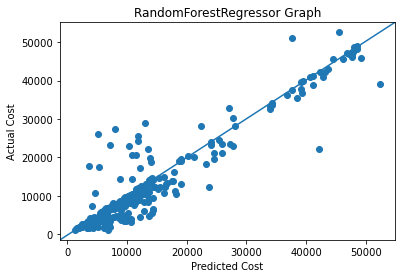

In [42]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred_rfReg, y_test)
plt.xlabel("Predicted Cost")
plt.ylabel("Actual Cost")
plt.title("RandomForestRegressor Graph")
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfReg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfReg)))

Mean Absolute Error: 2639.5316962281395
Root Mean Squared Error: 4442.550644258432


Observation:<br>
We can see that the model RMSE is $4,442 and a 0.875 score, which is my best model.

### $\bullet$ DummyRegressor

Let's have a look at the dummyRegressor and see how the model compares to it. The dummyRegressor model predicts the target by the mean. I'll compare the output to the output of the other models in order to get an indactaion how well the models did.

In [44]:
from sklearn.dummy import DummyRegressor
dReg = DummyRegressor(strategy="mean")
dReg.fit(x_train, y_train)
y_pred_dReg=dReg.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dReg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dReg)))
pd.DataFrame({'Actual Cost': y_test, 'Predicted Dummy Cost': y_pred_dReg, "Difference": np.array(abs(y_test-y_pred_dReg))})

Mean Absolute Error: 9420.088402029676
Root Mean Squared Error: 12619.408067596905


,Actual Cost,Predicted Dummy Cost,Difference
578,9724.53000,13201.182056,3476.652056
610,8547.69130,13201.182056,4653.490756
569,45702.02235,13201.182056,32500.840294
1034,12950.07120,13201.182056,251.110856
198,9644.25250,13201.182056,3556.929556
...,...,...,...
1084,15019.76005,13201.182056,1818.577994
726,6664.68595,13201.182056,6536.496106
1132,20709.02034,13201.182056,7507.838284
725,40932.42950,13201.182056,27731.247444


Observation:<br>
We can see that the RMSE is \\$12,619. A lot worse than the models.

In [45]:
a = metrics.mean_absolute_error(y_test, y_pred)
c = metrics.mean_absolute_error(y_test, y_pred_dtReg)
v = metrics.mean_absolute_error(y_test, y_pred_rfReg)

In [46]:
model_names=['LinearRegression', 'DecisionTreeRegressor','RandomForestRegressor']
acc=[0.7619016217522223,0.838583256664294,rfReg.score(x_test,y_test)]

d={'Modelling':model_names,'Accuracy':acc}    
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling,Accuracy
0,LinearRegression,0.761902
1,DecisionTreeRegressor,0.838583
2,RandomForestRegressor,0.875974
